# Mustererkennung/Machine Learning - Assignment 7



In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Load the spam dataset:

In [5]:
data = np.array(pd.read_csv('./spambase/spambase.data', header=None))

X = data[:,:-1] # features
y = data[:,-1] # Last column is label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, stratify=y)


In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train[1])
print(y_train[1])

(3450, 57)
(1151, 57)
(3450,)
(1151,)
[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.14   0.     0.     0.     0.     0.     0.     2.29   0.
  0.     0.     0.     0.     1.14   1.14   0.     0.     0.     0.
  1.14   0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     2.29   0.     0.     0.     0.     0.     0.
  0.     0.596  0.     0.198  2.133 14.    64.   ]
0.0


# Task 1

![email.jpg](email.jpg)

As in email, we are permitted to use in sklearn defined decision tree. So we have imported sklearn in the next block 

```py
from sklearn import tree
...
weak_clf=tree.DecisionTreeClassifier(max_depth = 1)

```

In [20]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

def my_adaboost_clf(Y_train, X_train, Y_test, X_test, n_trees=20, weak_clf=tree.DecisionTreeClassifier(max_depth = 1)):
    n_train, n_test = X_train.shape[0], X_test.shape[0]
    
    # Initialize all w_i
    w = np.ones(n_train) / n_train
    
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    res = []
    
    for i in range(n_trees):
        # Fit a classifier with the specific weights
        weak_clf.fit(X_train, Y_train, sample_weight = w)
        
        pred_train_i = weak_clf.predict(X_train)
        pred_test_i = weak_clf.predict(X_test)
        
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        print("weak_clf_%02d train acc: %.4f" % (i + 1, 1 - sum(miss) / n_train))
        
        res.append(1 - sum(miss) / n_train)
        
        # Error
        err_m = np.dot(w, miss)
        
        # Alpha
        alpha_m = 0.5 * np.log((1 - err_m) / float(err_m))
        
        # New weights
        miss2 = [x if x==1 else -1 for x in miss] # -1 * y_i * G(x_i): 1 / -1
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        w = w / sum(w)

        # Add to prediction
        pred_train_i = [1 if x == 1 else -1 for x in pred_train_i]
        pred_test_i = [1 if x == 1 else -1 for x in pred_test_i]
        pred_train = pred_train + np.multiply(alpha_m, pred_train_i)
        pred_test = pred_test + np.multiply(alpha_m, pred_test_i)
    
    print("**************************************")
    print("Confusion matrix:")
    pred_train = (pred_train > 0) * 1
    estimates = (np.array(pred_train) > 0.5)
    print(confusion_matrix(pred_train, estimates))
    
    pred_test = (pred_test > 0) * 1
    estimates = (np.array(pred_test) > 0.5)
    print(confusion_matrix(pred_test, estimates))
    
    print("**************************************")

    print("My AdaBoost clf train accuracy: %.4f" % (sum(pred_train == Y_train) / n_train))
    print("My AdaBoost clf test accuracy: %.4f" % (sum(pred_test == Y_test) / n_test))
    
    num_trees = np.arange(1, 21)
    plt.plot(num_trees, np.asarray(res))
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy")

## Task 1 a)

weak_clf_01 train acc: 0.7928
weak_clf_02 train acc: 0.7925
weak_clf_03 train acc: 0.6061
weak_clf_04 train acc: 0.7586
weak_clf_05 train acc: 0.5597
weak_clf_06 train acc: 0.7145
weak_clf_07 train acc: 0.7214
weak_clf_08 train acc: 0.5296
weak_clf_09 train acc: 0.6061
weak_clf_10 train acc: 0.4571
weak_clf_11 train acc: 0.6061
weak_clf_12 train acc: 0.5597
weak_clf_13 train acc: 0.6061
weak_clf_14 train acc: 0.4849
weak_clf_15 train acc: 0.6061
weak_clf_16 train acc: 0.5597
weak_clf_17 train acc: 0.6061
weak_clf_18 train acc: 0.4893
weak_clf_19 train acc: 0.6061
weak_clf_20 train acc: 0.6061
**************************************
Confusion matrix:
[[2136    0]
 [   0 1314]]
[[711   0]
 [  0 440]]
**************************************
My AdaBoost clf train accuracy: 0.9116
My AdaBoost clf test accuracy: 0.9114


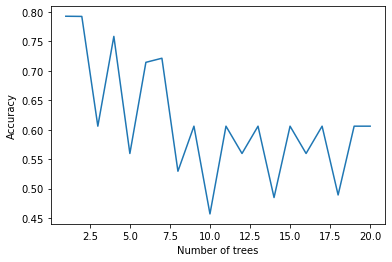

In [21]:
my_adaboost_clf(y_train, X_train, y_test, X_test)

In [22]:
def my_adaboost_clf_depth2(Y_train, X_train, Y_test, X_test, n_trees=20, weak_clf=tree.DecisionTreeClassifier(max_depth = 2)):
    n_train, n_test = X_train.shape[0], X_test.shape[0]
    
    # Initialize all w_i
    w = np.ones(n_train) / n_train
    
    pred_train, pred_test = [np.zeros(n_train), np.zeros(n_test)]
    
    res = []
    
    for i in range(n_trees):
        # Fit a classifier with the specific weights
        weak_clf.fit(X_train, Y_train, sample_weight = w)
        
        pred_train_i = weak_clf.predict(X_train)
        pred_test_i = weak_clf.predict(X_test)
        
        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        print("weak_clf_%02d train acc: %.4f" % (i + 1, 1 - sum(miss) / n_train))
        
        res.append(1 - sum(miss) / n_train)
        
        # Error
        err_m = np.dot(w, miss)
        
        # Alpha
        alpha_m = 0.5 * np.log((1 - err_m) / float(err_m))
        
        # New weights
        miss2 = [x if x==1 else -1 for x in miss] # -1 * y_i * G(x_i): 1 / -1
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        w = w / sum(w)

        # Add to prediction
        pred_train_i = [1 if x == 1 else -1 for x in pred_train_i]
        pred_test_i = [1 if x == 1 else -1 for x in pred_test_i]
        pred_train = pred_train + np.multiply(alpha_m, pred_train_i)
        pred_test = pred_test + np.multiply(alpha_m, pred_test_i)
    
    print("**************************************")
    print("Confusion matrix:")
    pred_train = (pred_train > 0) * 1
    estimates = (np.array(pred_train) > 0.5)
    print(confusion_matrix(pred_train, estimates))
    
    pred_test = (pred_test > 0) * 1
    estimates = (np.array(pred_test) > 0.5)
    print(confusion_matrix(pred_test, estimates))
    
    print("**************************************")

    print("My AdaBoost clf train accuracy: %.4f" % (sum(pred_train == Y_train) / n_train))
    print("My AdaBoost clf test accuracy: %.4f" % (sum(pred_test == Y_test) / n_test))
    
    num_trees = np.arange(1, 21)
    plt.plot(num_trees, np.asarray(res))
    plt.xlabel("Number of trees")
    plt.ylabel("Accuracy")

weak_clf_01 train acc: 0.8214
weak_clf_02 train acc: 0.8400
weak_clf_03 train acc: 0.7710
weak_clf_04 train acc: 0.6693
weak_clf_05 train acc: 0.7699
weak_clf_06 train acc: 0.5388
weak_clf_07 train acc: 0.7014
weak_clf_08 train acc: 0.3203
weak_clf_09 train acc: 0.5525
weak_clf_10 train acc: 0.7742
weak_clf_11 train acc: 0.6716
weak_clf_12 train acc: 0.6739
weak_clf_13 train acc: 0.5455
weak_clf_14 train acc: 0.6672
weak_clf_15 train acc: 0.4780
weak_clf_16 train acc: 0.6571
weak_clf_17 train acc: 0.5580
weak_clf_18 train acc: 0.6977
weak_clf_19 train acc: 0.5672
weak_clf_20 train acc: 0.6333
**************************************
Confusion matrix:
[[2144    0]
 [   0 1306]]
[[709   0]
 [  0 442]]
**************************************
My AdaBoost clf train accuracy: 0.9336
My AdaBoost clf test accuracy: 0.9357


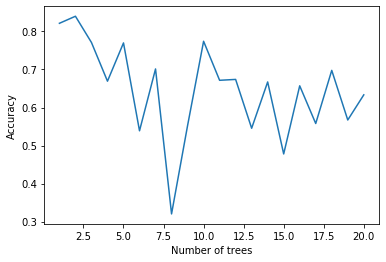

In [23]:
my_adaboost_clf_depth2(y_train, X_train, y_test, X_test)

AdaBoost should not be better when using stronger weak learners

Reasons: 
- Speed, as covered pretty well in the other answers;
- Accuracy improvement: if you already have a strong learner, the benefits of boosting are less relevant;
- Avoid overfitting

However, in our dataset, accuracy with strong weak learner is a little better. 93.57% vs 91.14%, although they are quiet close. 